<center style="padding: 3rem 2rem;
               border-radius: 20px;
               border: 4px solid #03fc77;
               text-align: center;">
<h1 style="color: #14d970; font-size: 2.5rem;">RSNA Breast Cancer Detection</h1>
<h2 style="color: #14d970; padding: 0; margin: 0; font-size: 2rem;">Perform Exploratory Data Analysis</h2>
<h2 style="color: #14d970; padding: 0;  margin:1rem 0 2rem 0; font-size: 1.25rem;">(As part of continuous learning - Akshu)</h2>
    <a style="background-color: #14d970; 
              border-radius: 50px; 
              padding: 1rem 2rem; 
              width: 15%;
              text-decoration: none;
              color: white;
              font-size: 1rem;
              text-align: center;"
              href="https://www.kaggle.com/akshuvenkataraman">@akshuvenkataraman</a>
</center>
</hmtl>

As part of the exploratory data analysis using the image dataset provided by the **RSNA Screening Mammography Breast Cancer Detection**, we will conduct below statistical analysis of both the meta data about the image dataset and the image analysis.  This will help us better understand the dataset, various categorization of the dataset and data availability for machine learning model development purpose. We will also visualize the dataset for clarity and explanations.

# Import Required Libraries

In [1]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Manage files
import pydicom
from os import listdir

from scipy.stats import mode

# Others
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Explore the patient metadata

In [2]:
filepath = '../input/rsna-breast-cancer-detection/train.csv'
data = pd.read_csv(filepath)
data.head()

site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
0        2       10006   462822612          L   CC  61.0       0       0   
1        2       10006  1459541791          L  MLO  61.0       0       0   
2        2       10006  1864590858          R  MLO  61.0       0       0   
3        2       10006  1874946579          R   CC  61.0       0       0   
4        2       10011   220375232          L   CC  55.0       0       0   

   invasive  BIRADS  implant density  machine_id  difficult_negative_case  
0         0     NaN        0     NaN          29                    False  
1         0     NaN        0     NaN          29                    False  
2         0     NaN        0     NaN          29                    False  
3         0     NaN        0     NaN          29                    False  
4         0     0.0        0     NaN          21                     True

# Identify Missing Values

In [3]:
data.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

As observed above, there are missing values for age, BIRADS, and density. The missing values can be substituted with mean and mode values for those columns to establish data consistency. This is a common practice.

In [6]:
num_patients = data['patient_id'].nunique()
min_patient_age = int(data['age'].min())
max_patient_age = int(data['age'].max())
groupby_id = data.groupby('patient_id')['cancer'].apply(lambda x: x.unique()[0])
n_negative = (groupby_id == 0).sum()
n_positive = (groupby_id == 1).sum()

print(f"There are {num_patients} different patients in the train set.\n")
print(f"The younger patient is {min_patient_age} years old.")
print(f"The older patient is {max_patient_age} years old.\n")
print(f"There are {n_negative} patients negative to breast cancer. Ratio = {n_negative * 100 / num_patients:.2f}%")
print(f"There are {n_positive} patients positive to breast cancer. Ratio = {n_positive * 100 / num_patients:.2f}%")

There are 11913 different patients in the train set.

The younger patient is 26 years old.
The older patient is 89 years old.

There are 11665 patients negative to breast cancer. Ratio = 97.92%
There are 248 patients positive to breast cancer. Ratio = 2.08%


As observed above, there is significant amount of class imbalance exists with only 2% of the image dataset classified as breast cancer.

# Age Distribution

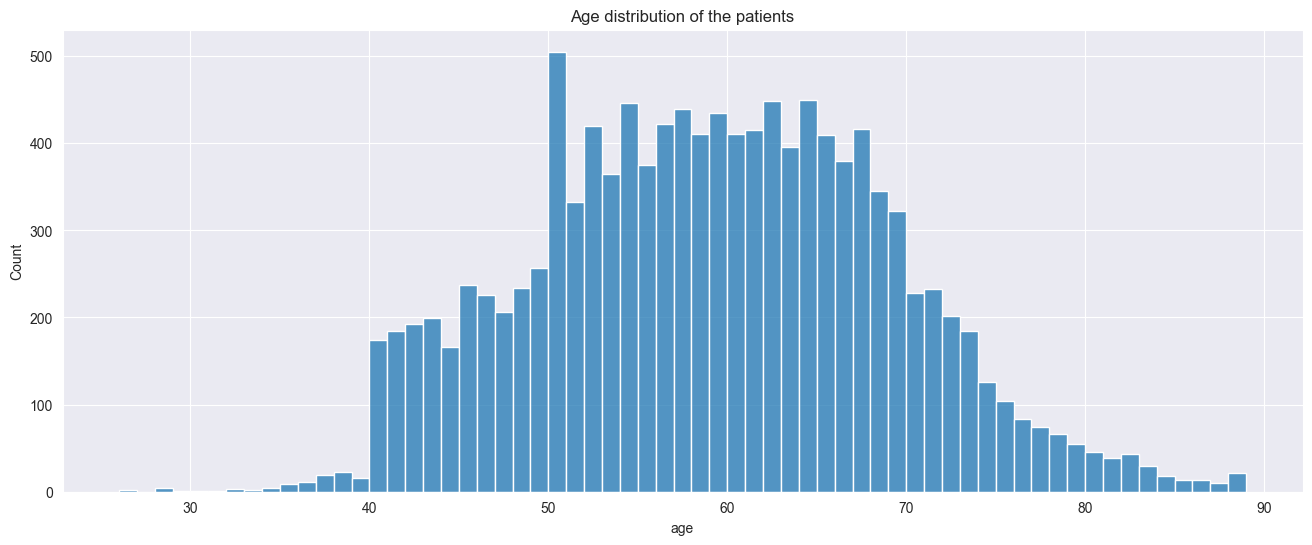

In [7]:
ages = data[data['age'].isna() == False].groupby('patient_id')['age'] \
    .apply(lambda x: x.unique()[0])

plt.figure(figsize=(16, 6))
sns.histplot(ages, bins=63)
plt.title("Age distribution of the patients")
plt.show()

In [9]:
# Statistics
print(f"Mean: {ages.mean():.2f}")
print(f"Std: {ages.std():.2f}")
print(f"Q1: {ages.quantile(0.25):.2f}")
print(f"Median: {ages.median():.2f}")
print(f"Q3: {ages.quantile(0.75):.2f}")
print(f"Mode: {ages.mode()[0]:.2f}")

Mean: 58.64
Std: 9.89
Q1: 51.00
Median: 59.00
Q3: 66.00
Mode: 50.00


### Additional Insights on Age distribution observed from above
* Majority of the patients are older than 40 years
* Number of patients seem to peak for 50 years age
* Most patients are between the age of 50 and 70

# Number of images per patient

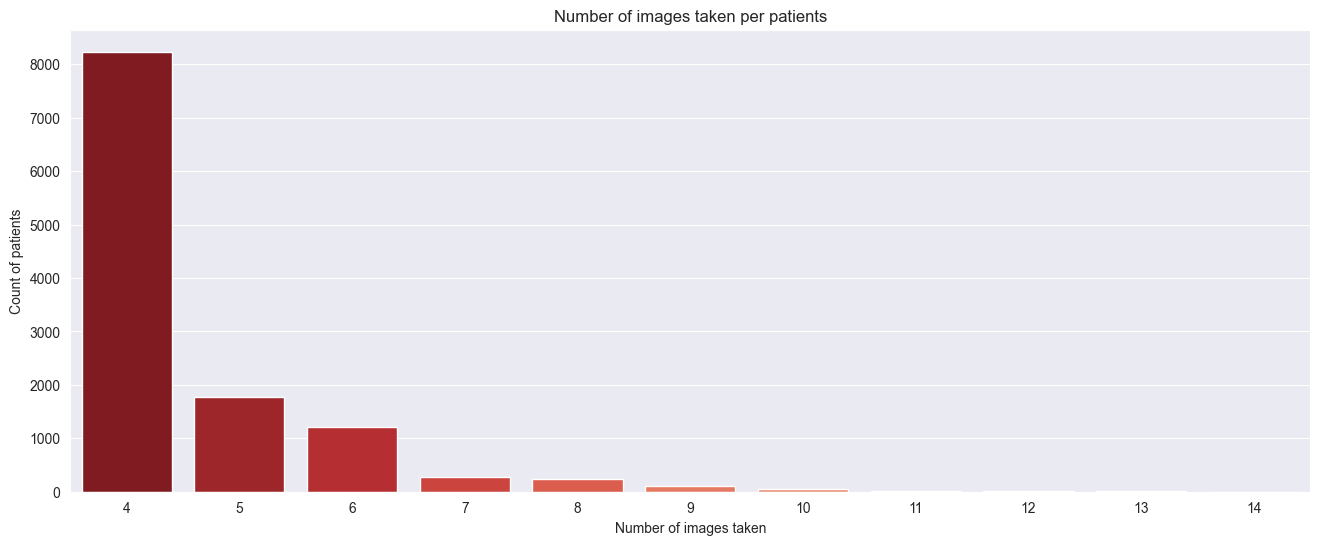

In [15]:
n_images_per_patient = data['patient_id'].value_counts()
plt.figure(figsize=(16, 6))
sns.countplot(x=n_images_per_patient, palette='Reds_r')
plt.title("Number of images taken per patients")
plt.xlabel('Number of images taken')
plt.ylabel('Count of patients')
plt.show()

As observed from above, most patients have 4 images. In other words, all of patients have 4 or more images to work with.

# Image Features Analysis

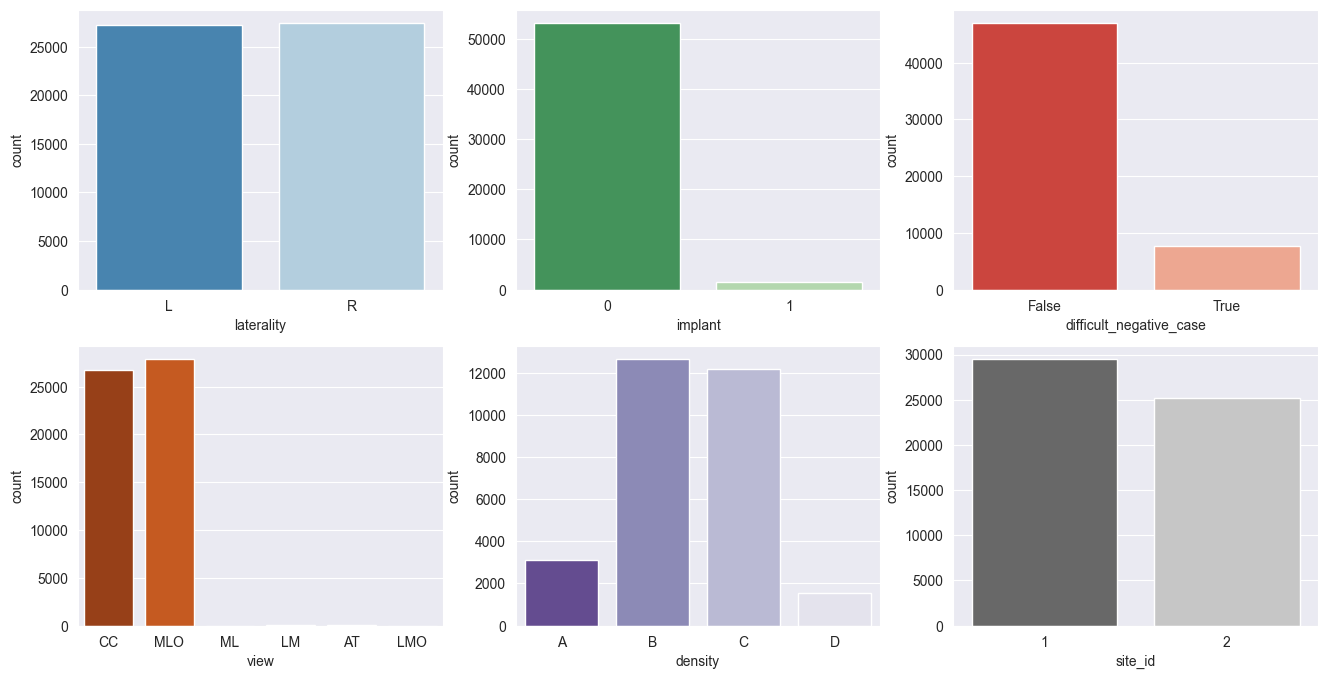

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
sns.countplot(x=data['laterality'], palette='Blues_r', ax=ax[0, 0])
sns.countplot(x=data['implant'], palette='Greens_r', ax=ax[0, 1])
sns.countplot(x=data['difficult_negative_case'], palette='Reds_r', ax=ax[0, 2])
sns.countplot(x=data['view'], palette='Oranges_r', ax=ax[1, 0])
sns.countplot(x=data['density'], palette='Purples_r', order=['A', 'B', 'C', 'D'], ax=ax[1, 1])
sns.countplot(x=data['site_id'], palette='Greys_r', ax=ax[1, 2])
plt.show()

### Highlights from above plots
* Laterality - the images are balanced in terms of laterality
* Implant - Very few images are with implants
* Difficult Negative Case - these very difficult to analyze images
* View - Vast majority of the images are either CC or MLO view category while other category images are available in small numbers (ML, LM, AT and LMO)
* Density - Most of the images show density to be in the middle (B and C), while some images show larger density of A or smaller density of D
* site_id - Images are from two different sites and they are balanced

# Cancer Analysis using Biopsy data

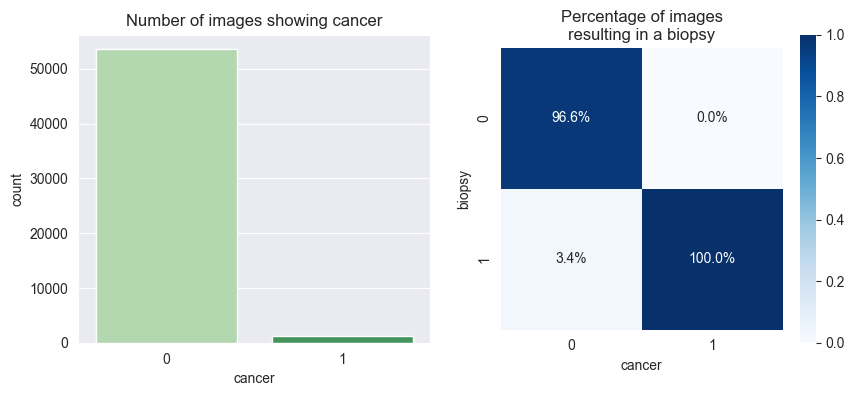

In [17]:
biopsy_counts = data.groupby('cancer')['biopsy'].value_counts().unstack().fillna(0)
biopsy_perc = biopsy_counts.transpose() / biopsy_counts.sum(axis=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=data['cancer'], palette='Greens', ax=ax[0])
sns.heatmap(biopsy_perc, square=True, annot=True, fmt='.1%', cmap='Blues', ax=ax[1])
ax[0].set_title("Number of images showing cancer")
ax[1].set_title("Percentage of images\nresulting in a biopsy")
plt.show()

### Insights from above
* Cancer images are very low as compared to healthy images
* All patients with cancer had biopsy
* Small number of images without cancer went through biopsy

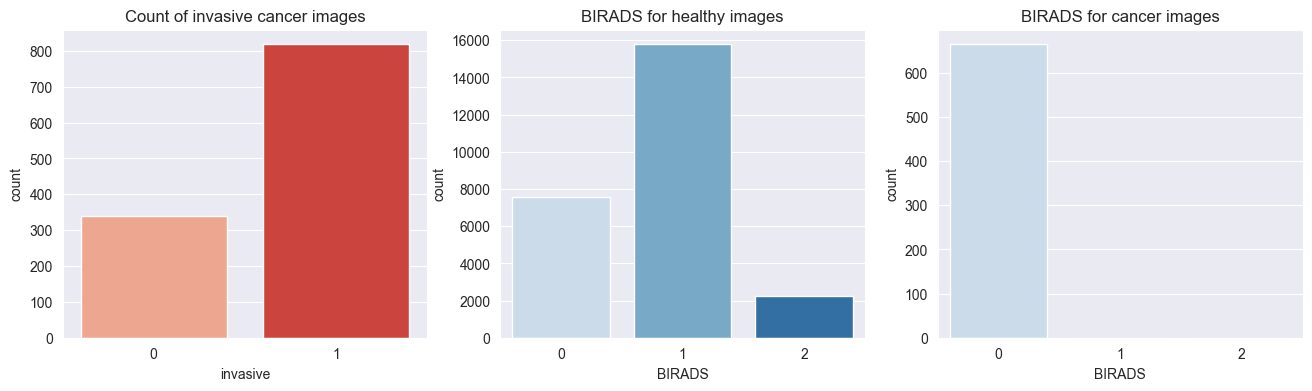

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
sns.countplot(x=data[data['cancer'] == True]['invasive'], ax=ax[0], palette='Reds')
sns.countplot(x=data[data['cancer'] == False]['BIRADS'], order=[0, 1, 2], ax=ax[1], palette='Blues')
sns.countplot(x=data[data['cancer'] == True]['BIRADS'], order=[0, 1, 2], ax=ax[2], palette='Blues')
ax[0].set_title("Count of invasive cancer images")
ax[1].set_title("BIRADS for healthy images")
ax[2].set_title("BIRADS for cancer images")
plt.show()

### BIRADS
* 0 - required follow-up
* 1 - rated as negative for cancer
* 2 - rated as normal

### Insights from above
* Most of the cancer images are invasive
* Very few healthy images led to follow-up
* All cancer images required follow-up

# Machine IDs

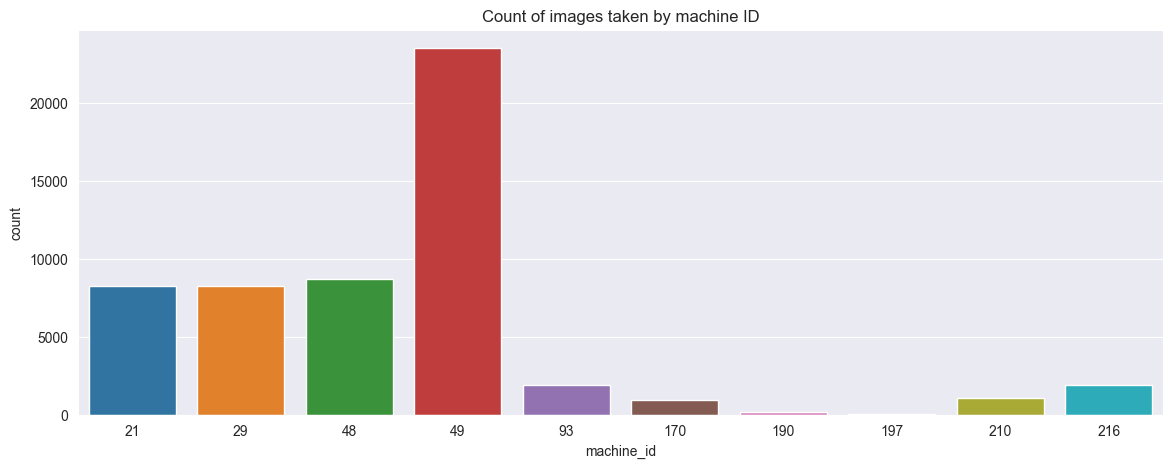

In [21]:
plt.figure(figsize=(14, 5))
sns.countplot(x=data['machine_id'])
plt.title("Count of images taken by machine ID")
plt.show()

### Insights from above
* The images are from 10 different machines
* Most of the images are from machine 21, 29, 48, and 49
* Higher machine numbers seem to have produced lower number of images

# Explore Image Data

## DICOM Files

All images are DICOM format (Digital Imaging and Communications in Medicine). This is standard format for storing and transmitting medical images along with image related information. It consists of a set of data elements that are organized into a file structure. These data elements contain information about the medical image, such as the patient's name and medical record number, the image modality (e.g., CT, MRI, X-ray), the date and time the image was taken, and the image itself. The image data can be stored in various formats, such as 8-bit or 16-bit grayscale, or 24-bit color. In addition to the image data, the DICOM format also includes metadata that describes the characteristics of the image, such as the image resolution, the size of the image in pixels, and the orientation of the image. This metadata is important for accurately displaying and interpreting the image. The DICOM format is widely used in the medical community for storing, sharing, and analyzing medical images. It is supported by a wide range of medical devices, such as scanners, modalities, and workstations, and is used in hospitals, clinics, and research facilities around the world.

In [22]:
train_path = '../input/rsna-breast-cancer-detection/train_images'
test_path = '../input/rsna-breast-cancer-detection/test_images'

# Function to load all images of a single patient

In [23]:
def load_patient_scans(path, patient_id):
    patient_path = path + '/' + str(patient_id)
    return [pydicom.dcmread(patient_path + '/' + file) for file in listdir(patient_path)]

In [24]:
# Load all scans of the twelfth patient
patient_ids = data['patient_id'].unique()
scans = load_patient_scans(train_path, patient_ids[11])

# Pixel Distribution for all the images

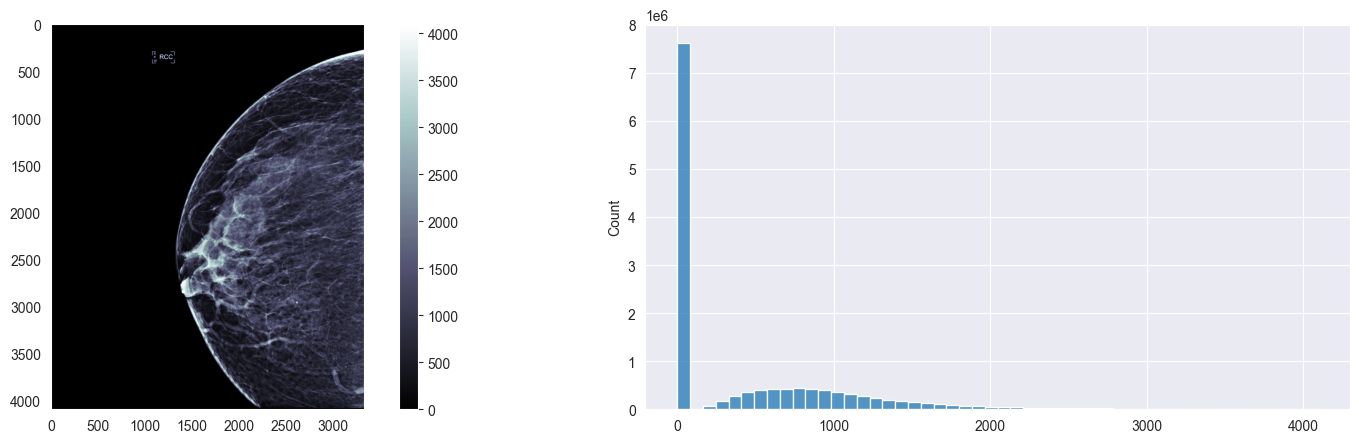

In [25]:
# Look at raw pixelarrays
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
im = ax[0].imshow(scans[0].pixel_array, cmap='bone')
ax[0].grid(False)
fig.colorbar(im, ax=ax[0])
sns.histplot(scans[0].pixel_array.flatten(), ax=ax[1], bins=50)
plt.show()

The value of the background is zero as seen above. The raw pixel array is in Hounsfield Units (HU). We can also observe that some image pixel values are very large. Converting the image to HU can help us get image pixel array consistency.

Let us review Machine IDs

In [26]:
def get_scan_info():
    modes, rows, cols = [], [], []
    machine_ids = data['machine_id'].unique()
    for m_id in machine_ids:
        m_id_modes, m_id_rows, m_id_cols = [], [], []
        print(f"Machine id {m_id} in progress")
        patient_ids = data[data['machine_id'] == m_id]['patient_id'].unique()
        for n in range(50):
            try:
                scan = load_patient_scans(train_path, patient_ids[n])[0]
                m_id_modes.append(mode(scan.pixel_array.flatten())[0][0])
                m_id_rows.append(scan.Rows)
                m_id_cols.append(scan.Columns)
            except IndexError:
                break
        modes.append(m_id_modes)
        rows.append(m_id_rows)
        cols.append(m_id_cols)
    return modes, rows, cols

In [27]:
modes, rows, cols = get_scan_info()

machine_ids = data['machine_id'].unique()
medians = [np.median(x) for x in modes]
stds = [np.std(x) for x in modes]
rows = [np.mean(x) for x in rows]
cols = [np.mean(x) for x in cols]
df = pd.DataFrame(data={'Machine ID': machine_ids, 'Mode (median)': medians, 'Mode (std)': stds, 'Rows (mean)': rows, 'Cols (mean)': cols})
df.astype(int).set_index('Machine ID').T

Machine id 29 in progress
Machine id 21 in progress
Machine id 216 in progress
Machine id 93 in progress
Machine id 49 in progress
Machine id 48 in progress
Machine id 170 in progress
Machine id 210 in progress
Machine id 190 in progress
Machine id 197 in progress


Machine ID      29    21    216   93    49    48    170   210   190   197
Mode (median)  3476     0     0     0     0     0     0  1017     0     0
Mode (std)      266     0   145   286     0     0     0     2    71   176
Rows (mean)    5355  2776  2294  2862  3819  4096  3804  5072  2322  2168
Cols (mean)    4915  2082  1914  2269  3051  3328  3036  3872  1931  1811

### Highlights from above
* Pixel distribution appears to be different based on the scanned machine ID
* The mode corresponds to background and it is calibrated to zero for all but two machines (29 and 210)
* The value of Photometric Interpretation must be observed. There are 2 types:
  - In a MONOCHROME1 image, the pixel values represent the grayscale values of the image, with higher values corresponding to brighter pixels and lower values corresponding to darker pixels.
  - In a MONOCHROME2 image, the pixel values are reversed, with higher values corresponding to darker pixels and lower values corresponding to brighter pixels.
* The image size also depends on the machine. Again, machines 29 and 210 have a high resolution compared to others like machine IDs 216 and 197.
* It will be necessary to normalize the image size and the pixel values in order to train a robust model.

# Display sample images from different machines

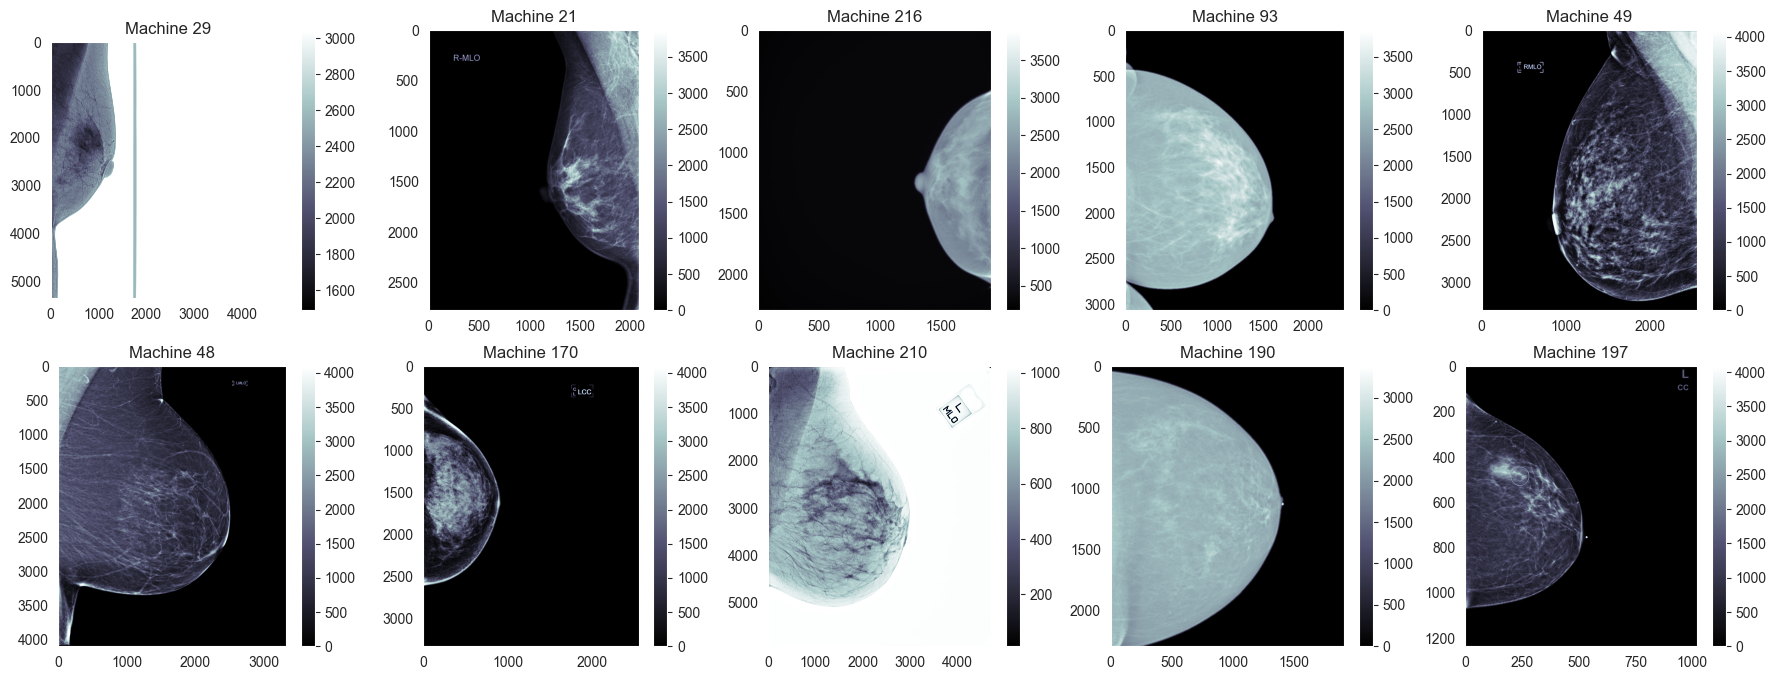

In [28]:
plt.figure(figsize=(22, 8))
for i, m_id in enumerate(machine_ids):
    patient_ids = data[data['machine_id'] == m_id]['patient_id'].unique()
    scan = load_patient_scans(train_path, patient_ids[0])[0] # Load first scan of first patient
    plt.subplot(2, 5, i+1)
    plt.imshow(scan.pixel_array, cmap='bone')
    plt.title(f"Machine {m_id}")
    plt.colorbar()
    plt.grid(False)
plt.show()

# Highlights from above
* Machine 29 and 210 show the plain / white background while other machines show the dark background as observed previously
* It is possible to convert MONOCHROME1 to MONOCHROME2 by applying this formula to the pixelarray (then the way all images are interpreted is the same):

> array = array.max() - array

# Images with implants

In [29]:
m_id_implants = data[data['implant'] == 1]['machine_id'].unique()
print("Scans showing implents are from machines", m_id_implants)

Scans showing implents are from machines [ 49 170]


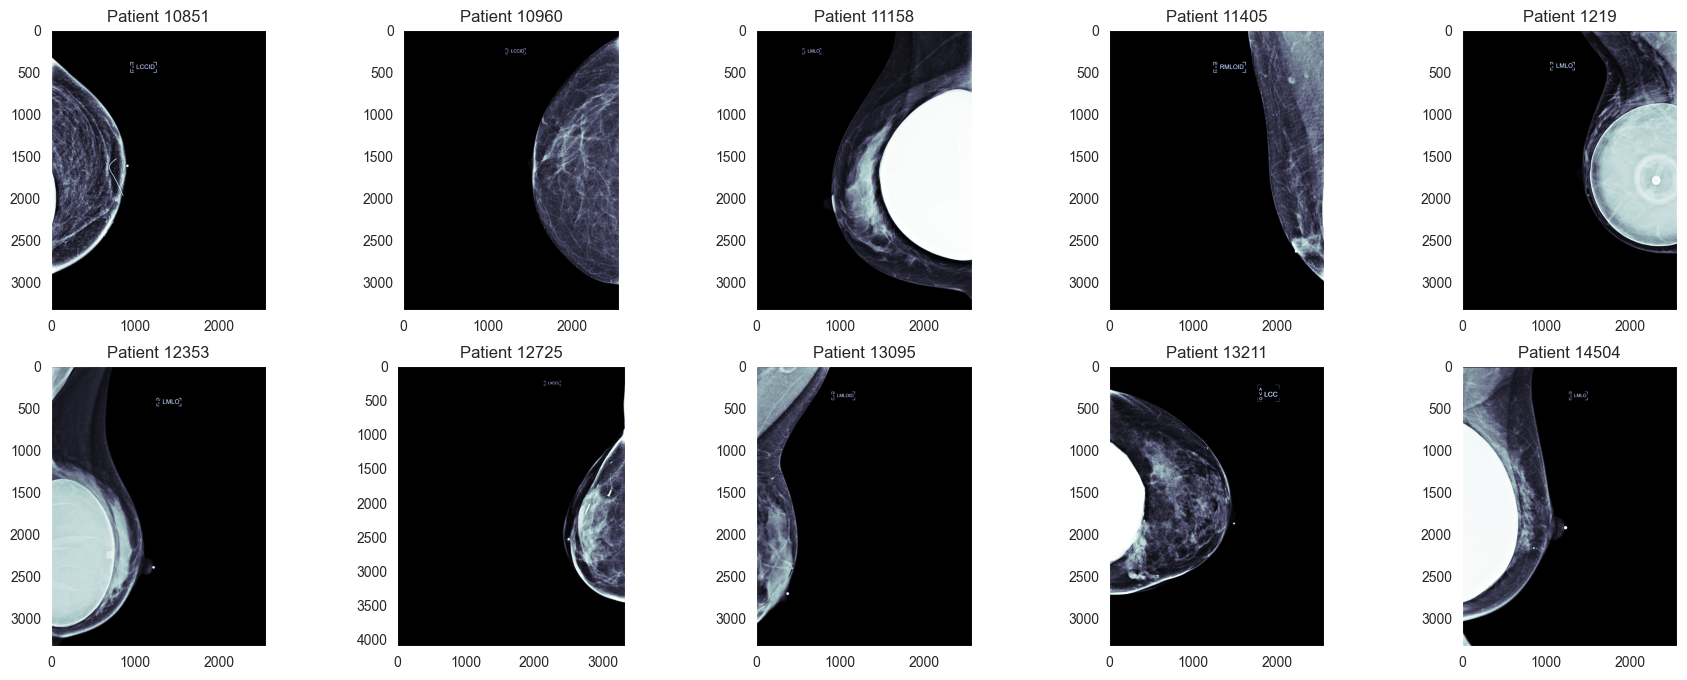

In [30]:
patient_ids = data[data['implant'] == 1]['patient_id'].unique()

# Display scans showing implants
plt.figure(figsize=(22, 8))
for i in range(10):
    scan = load_patient_scans(train_path, patient_ids[i])[0] # Load first scan of the patient
    plt.subplot(2, 5, i+1)
    plt.imshow(scan.pixel_array, cmap='bone')
    plt.title(f"Patient {patient_ids[i]}")
    plt.grid(False)
plt.show()

The implant is distinguished by the white mass in the breast. However, it is sometimes not very easy to see it like with patients 10960 and 13095.

Let's check all the scans of a single patient having implant.

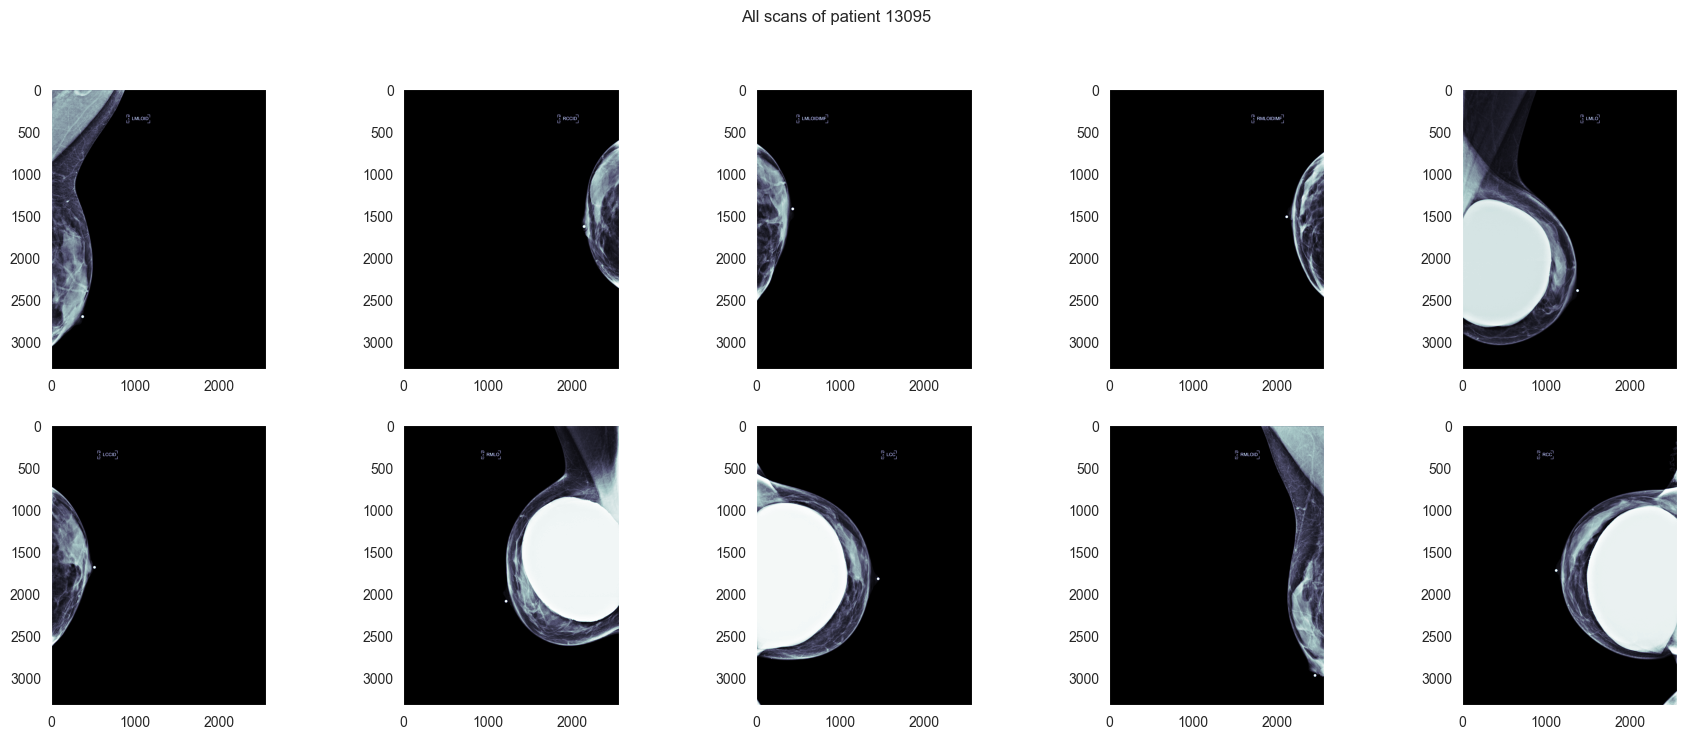

In [31]:
# Display scans of patient 13095
plt.figure(figsize=(22, 8))
scans = load_patient_scans(train_path, 13095)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(scans[i].pixel_array, cmap='bone')
    plt.grid(False)
plt.suptitle("All scans of patient 13095")
plt.show()

# Highlights from above
* All the scans showing implants are from machines 49 and 170.
* The implants are sometimes only present on one side and not in both breasts for a given patient.
* The metadata does not specify the presence of implent for a scan but for a given patient. It is therefore likely that an image without an implant indicates its presence.

# Images with cancer

In [32]:
# Choose to display images with or without cancer
def display_cancer_or_not(cancer=True):
    cancer_scans = data[data['cancer'] == int(cancer)].sample(frac=1, random_state=0)
    plt.figure(figsize=(22, 10))
    for i in range(10):
        patient = str(cancer_scans.iloc[i][['patient_id']][0])
        file = str(cancer_scans.iloc[i][['image_id']][0]) + '.dcm'
        scan = pydicom.dcmread(train_path + '/' + patient + '/' + file)
        plt.subplot(2, 5, i+1)
        plt.imshow(scan.pixel_array, cmap='bone')
        plt.title(f"Patient {patient}\nScan {file}")
        plt.grid(False)
    plt.suptitle(f"Cancer = {cancer}")
    plt.show()

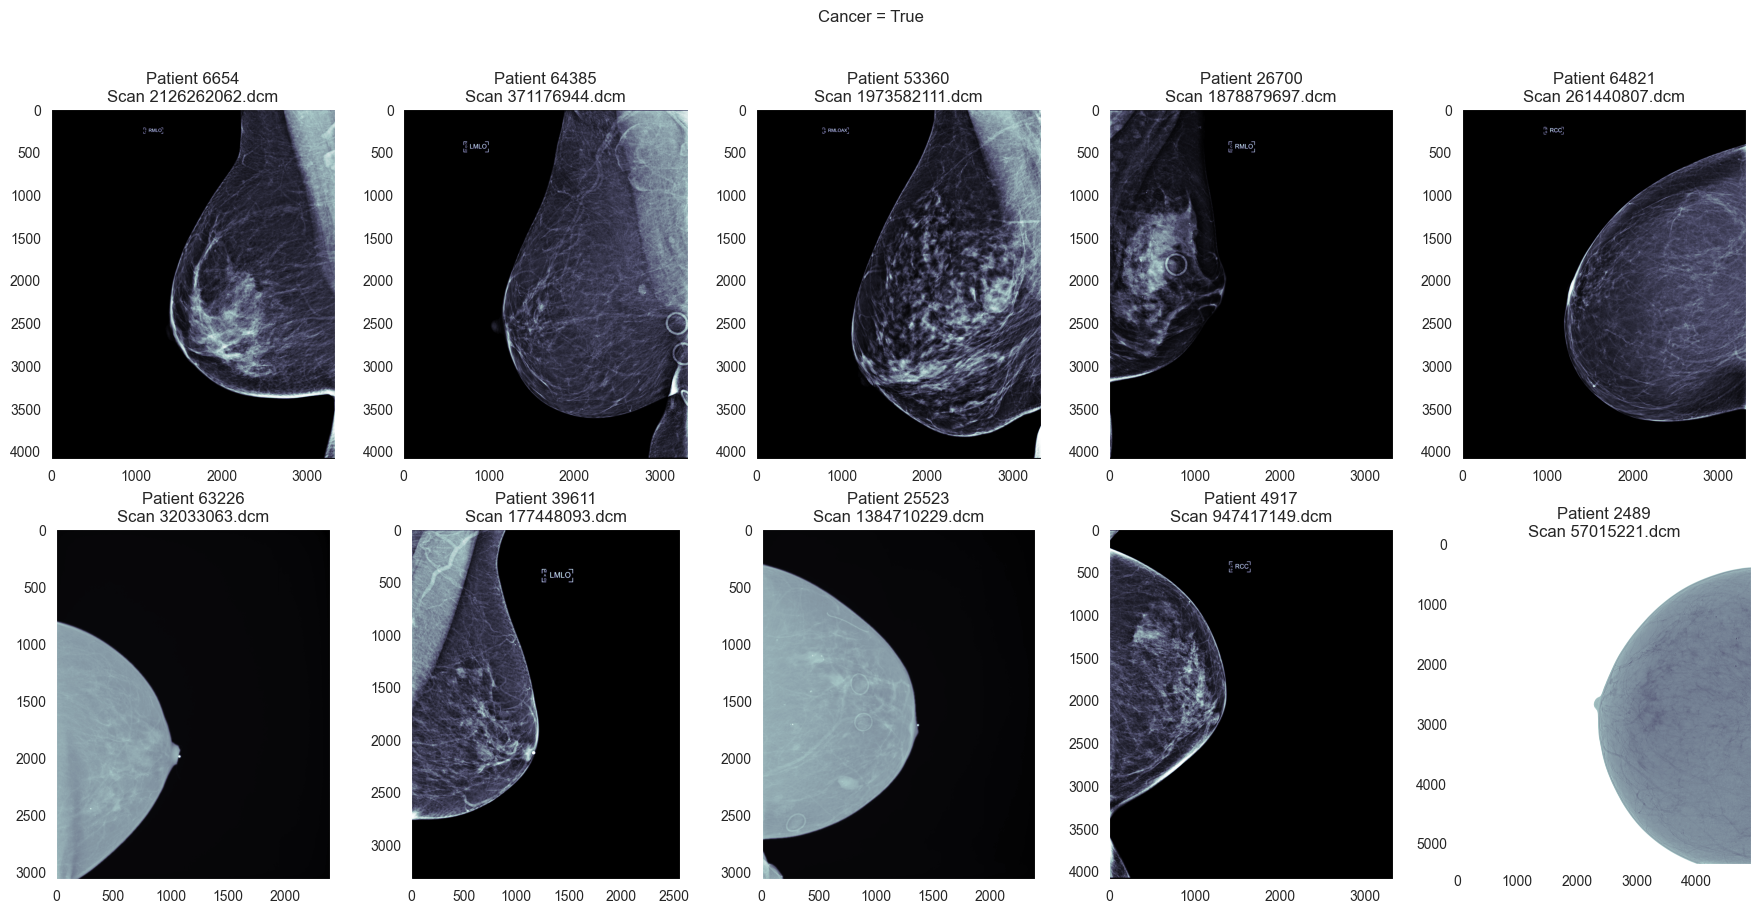

In [33]:
# Images with cancer
display_cancer_or_not(cancer=True)

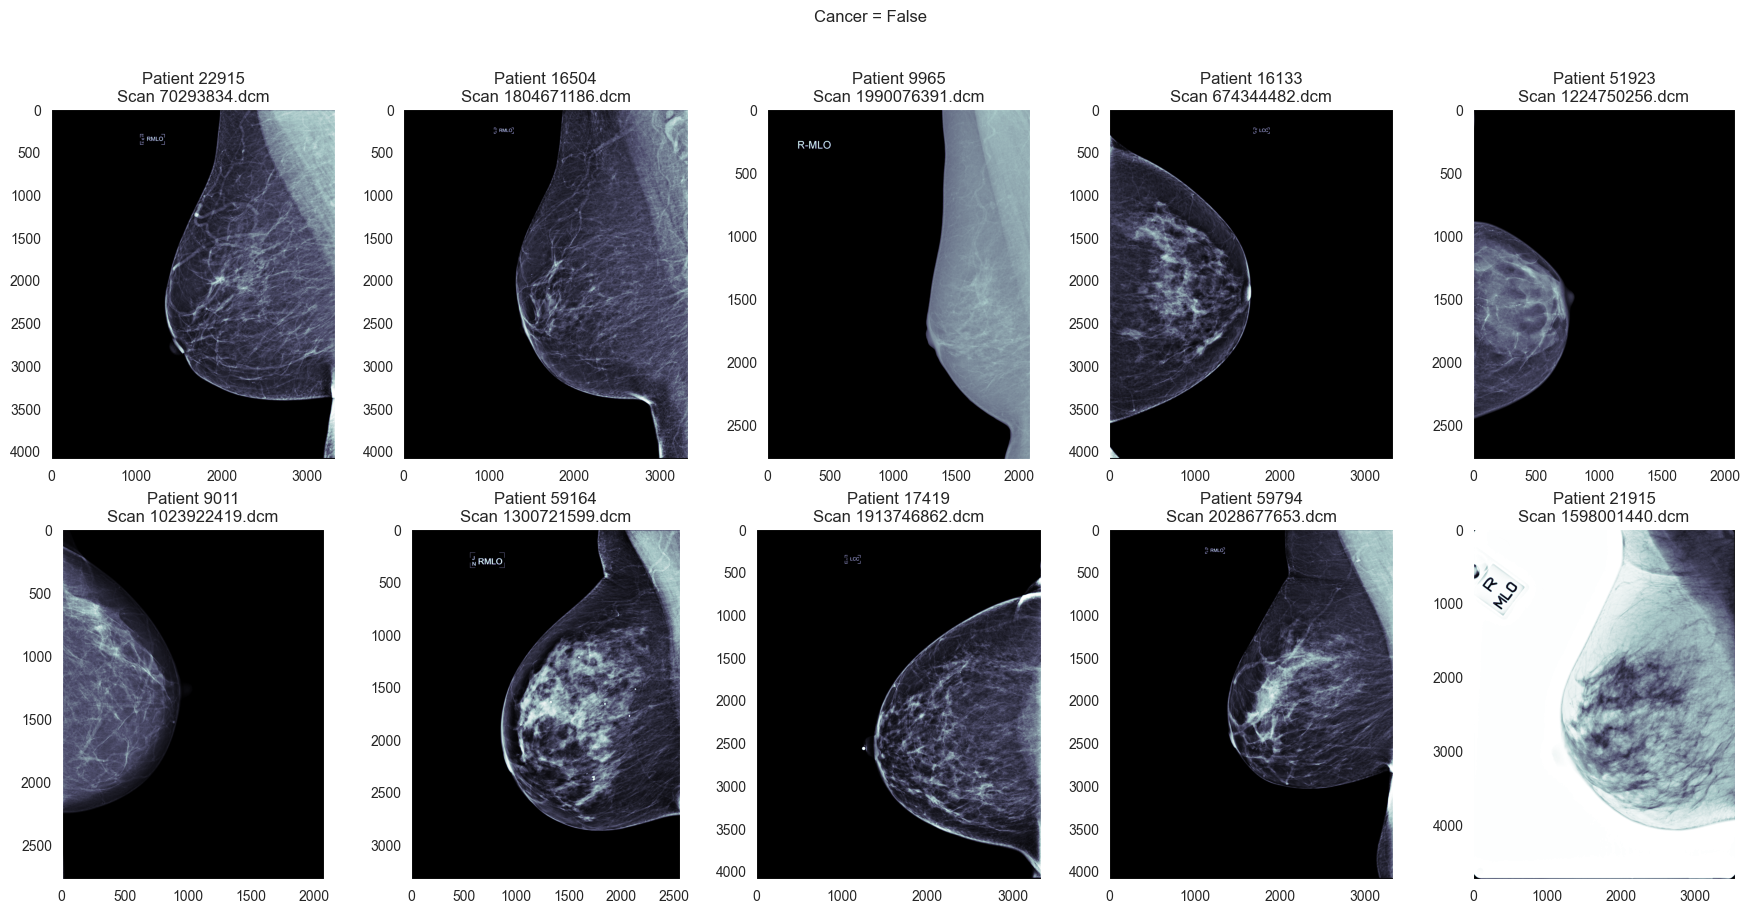

In [34]:
# Images without cancer
display_cancer_or_not(cancer=False)

# Highlights from above
* It is impossible for me to distinguish by eye an image with cancer from a healthy image
* Again, there are images from different machine IDs which results in different pixel distributions

# Conclusions
* The dataset is heavily unbalanced between scans with and without cancer.
* Most of the patients are over 40 years old.
* Images are quite large and will need to be rescaled during preprocessing.
* Pixel distributions vary significantly depending on the machine ID used.
* The dataset is also unbalanced in terms of images showing implants.
* It is very difficult for a novice to distinguish a scan with cancer from a healthy one.

Performing EDA was very informative. It helped me understand what needs to be taken into consideration during the preprocessing steps.